In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [9]:
# Load the image
image = cv2.imread('parrot.jpg')

if image is None:
    raise FileNotFoundError("Image not found. Make sure the path is correct.")


In [10]:
# Convert to RGB for displaying with matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [11]:
# Original image dimensions
height, width = image.shape[:2]

#Smoothing Filters

###1. Mean Filter

Reduces noise by averaging pixel values in a neighborhood, creating a smoothing effect.  

The kernel for a 3×3 mean filter, where all values are equal and their sum is 1:
```python
Mean Kernel = 1/9 * [[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]]
```

For a 5×5 mean filter, each element would be \(1/25\).


In [13]:
mean_kernel = np.ones((5, 5), np.float32) / 25
mean_filtered = cv2.filter2D(image, -1, mean_kernel)

---
###2. Gaussian Filter
Blurs the image with a Gaussian kernel, offering smoother and more natural results.

Example of a 3×3 Gaussian kernel (standard deviation = 1\):
```python
Gaussian Kernel ≈ [[1,  2,  1],
                   [2,  4,  2],
                   [1,  2,  1]] / 16
```
The values depend on the Gaussian function and kernel size.


In [14]:
gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 0)

---
### 3. Median Filter
Replaces each pixel with the median of its neighbors, effective for removing salt-and-pepper noise.

 **No fixed kernel** for the Median Filter.
  - Instead, it calculates the median value from the neighborhood for each pixel.

In [15]:
median_filtered = cv2.medianBlur(image, 5)

---
###4. Low Pass Gaussian Blurring
Blurs the image by suppressing high-frequency components, useful for noise reduction.

Similar to the Gaussian Filter, using a Gaussian kernel:
```python
Low-Pass Kernel ≈ [[1,  2,  1],
                   [2,  4,  2],
                   [1,  2,  1]] / 16
```

In [19]:
low_pass_filtered = cv2.GaussianBlur(image, (15, 15), 0)

#Sharpening Filters

### 1. Laplacian Filter
Enhances edges by detecting intensity changes using second-order derivatives.

A common 3×3 Laplacian kernel:
```python
Laplacian Kernel = [[ 0, -1,  0],
                    [-1,  4, -1],
                    [ 0, -1,  0]]
```
Other variants exist, such as using 8 in the center instead of 4.


In [17]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
laplacian_filtered = cv2.Laplacian(gray_image, cv2.CV_64F)

---
###2. Unsharp Mask
Combines the original image with a blurred version to sharpen and emphasize edges.

**No fixed kernel** for the unsharp mask.
  - It’s computed by combining the original image and its blurred version: (Unsharp Mask = Original Image - Blurred Image)

In [18]:
gaussian_blur = cv2.GaussianBlur(image, (9, 9), 10.0)
unsharp_mask = cv2.addWeighted(image, 1.5, gaussian_blur, -0.5, 0)

---
###3. High-Pass Filter
Preserves high-frequency details (edges) while suppressing low-frequency areas.

 A 3×3 high-pass filter kernel:
```python
High-Pass Kernel = [[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1]]
```

In [20]:
high_pass_kernel = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])
high_pass_filtered = cv2.filter2D(image, -1, high_pass_kernel)

---
###4. High-Boost Filtering
Amplifies edges while retaining the original image details, controlled by a boost factor.

**Derived from high-pass filtering**:
High-Boost = A . Original Image - Blurred Image

No fixed kernel, as it depends on the boosting factor \(A\).

In [ ]:
boost_factor = 1.5  # Adjust this to control edge enhancement
high_boost = cv2.addWeighted(image, boost_factor, gaussian_blur, (1 - boost_factor), 0)

#Displaying All Filters

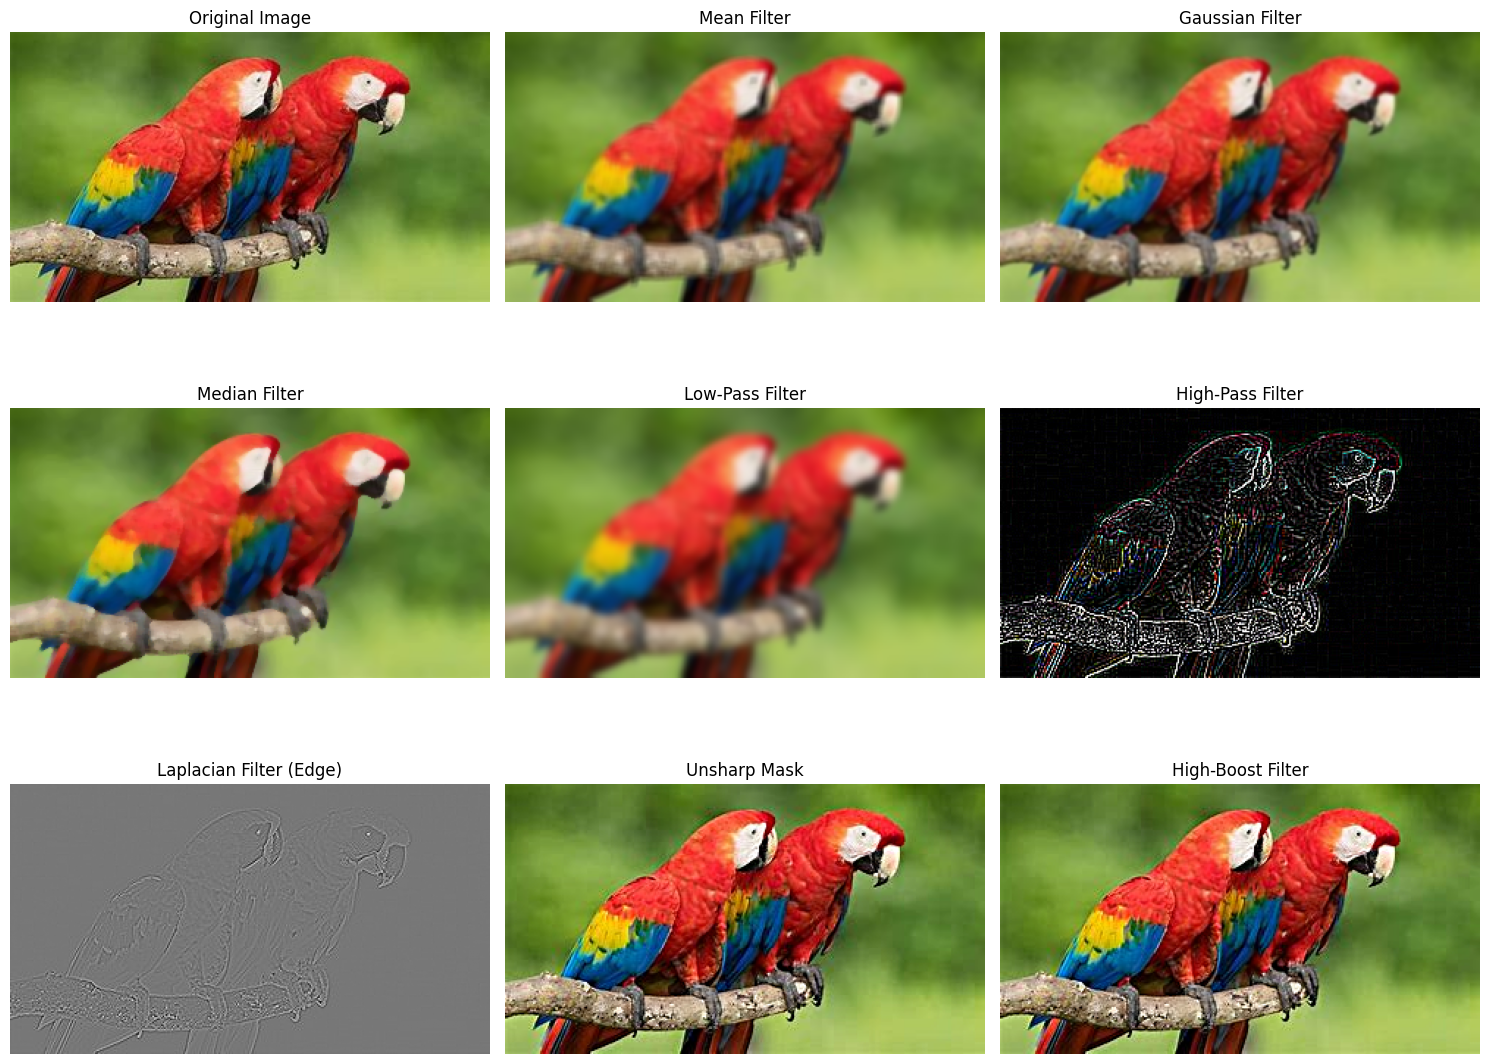

In [21]:
plt.figure(figsize=(15, 12))

# Original Image
plt.subplot(3, 3, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

# Mean Filter
plt.subplot(3, 3, 2)
plt.title("Mean Filter")
plt.imshow(mean_filtered)
plt.axis("off")

# Gaussian Filter
plt.subplot(3, 3, 3)
plt.title("Gaussian Filter")
plt.imshow(gaussian_filtered)
plt.axis("off")

# Median Filter
plt.subplot(3, 3, 4)
plt.title("Median Filter")
plt.imshow(median_filtered)
plt.axis("off")

# Low-Pass Filter
plt.subplot(3, 3, 5)
plt.title("Low-Pass Filter")
plt.imshow(low_pass_filtered)
plt.axis("off")

# High-Pass Filter
plt.subplot(3, 3, 6)
plt.title("High-Pass Filter")
plt.imshow(high_pass_filtered)
plt.axis("off")

# Laplacian Filter
plt.subplot(3, 3, 7)
plt.title("Laplacian Filter (Edge)")
plt.imshow(laplacian_filtered, cmap='gray')
plt.axis("off")

# Unsharp Mask
plt.subplot(3, 3, 8)
plt.title("Unsharp Mask")
plt.imshow(unsharp_mask)
plt.axis("off")

# High-Boost Filter
plt.subplot(3, 3, 9)
plt.title("High-Boost Filter")
plt.imshow(high_boost)
plt.axis("off")


# Tight layout for better spacing
plt.tight_layout()
plt.show()
